In [1]:
from importlib.machinery import SourceFileLoader
import pdb
import matplotlib.pyplot as plt
from time import sleep
from tqdm.notebook import tqdm_notebook
import numpy as np
from copy import copy
import pdb

In [2]:
plt.style.use('default')
plt.rc('figure', figsize = (15,8))
plt.rc('axes', labelsize=24)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [3]:
def init():
    Hext = 0;      # el campo externo 
    J = 1;         # la constante de interacción. 
    # rango y sampleo de temperaturas:
    
    kTmax=5; kTmin=kTmax/6; dkT = (kTmax-kTmin)/50; 
    kT=np.linspace(kTmax,kTmin,int((kTmax-kTmin)/dkT));
    return Hext,J,kT 


# Comienzo a hacer los cambios

In [4]:
ising = SourceFileLoader('ising','_ISING.py').load_module().ising

In [5]:
result={}

In [6]:
[Hext,J,kT]=init()
MCsteps = [5e5]
result = {8:{}, 16: {}}
#s0,MMEAN0,EMEAN0,E2MEAN0,MABSMEAN0, VARIANCE0 =ising(int(1e5), 2,Hext,kT,J);
for N, thisresult in result.items():
    for thismcsteps in MCsteps:
        thisresult[thismcsteps] = ising(int(thismcsteps), N,Hext,kT,J)
#s0,MMEAN0,EMEAN0,E2MEAN0,MABSMEAN0=ising(5E5, 2,Hext,kT,J);
#s0,MMEAN0,EMEAN0,E2MEAN0,MABSMEAN0=ising(1E6, 2,Hext,kT,J);
#s0,MMEAN0,EMEAN0,E2MEAN0,MABSMEAN0=ising(5E6, 2,Hext,kT,J);
#s1,MMEAN1,EMEAN1,E2MEAN1,MABSMEAN1=ising(int(5e4), 4,Hext,kT,J);
#s0,MMEAN0,EMEAN0,E2MEAN0,MABSMEAN0=ising(1e5, 4,Hext,kT,J);
#s0,MMEAN0,EMEAN0,E2MEAN0,MABSMEAN0, VARIANCE0=ising(int(5e5), 4,Hext,kT,J);
#s1,MMEAN1,EMEAN1,E2MEAN1,MABSMEAN1, VARIANCE1=ising(int(1e6), 4,Hext,kT,J);
#s0,MMEAN0,EMEAN0,E2MEAN0,MABSMEAN0=ising(int(5e4), 8,Hext,kT,J);
#s0,MMEAN0,EMEAN0,E2MEAN0,MABSMEAN0=ising(int(1e5), 8,Hext,kT,J);
#s0,MMEAN0,EMEAN0,E2MEAN0,MABSMEAN0=ising(5e5, 8,Hext,kT,J);
#s0,MMEAN0,EMEAN0,E2MEAN0,MABSMEAN0=ising(5e4, 16,Hext,kT,J);
#s0,MMEAN0,EMEAN0,E2MEAN0,MABSMEAN0=ising(1e5, 16,Hext,kT,J);
#s0,MMEAN0,EMEAN0,E2MEAN0,MABSMEAN0=ising(5e5, 16,Hext,kT,J);

N = 8, totalflips = 500000, KT = 0, flips = 222493, rejects = 277507
N = 8, totalflips = 500000, KT = 1, flips = 219757, rejects = 280243
N = 8, totalflips = 500000, KT = 2, flips = 217395, rejects = 282605
N = 8, totalflips = 500000, KT = 3, flips = 212909, rejects = 287091
N = 8, totalflips = 500000, KT = 4, flips = 209554, rejects = 290446
N = 8, totalflips = 500000, KT = 5, flips = 207113, rejects = 292887
N = 8, totalflips = 500000, KT = 6, flips = 202858, rejects = 297142
N = 8, totalflips = 500000, KT = 7, flips = 199674, rejects = 300326
N = 8, totalflips = 500000, KT = 8, flips = 195539, rejects = 304461
N = 8, totalflips = 500000, KT = 9, flips = 191843, rejects = 308157
N = 8, totalflips = 500000, KT = 10, flips = 186833, rejects = 313167
N = 8, totalflips = 500000, KT = 11, flips = 183049, rejects = 316951
N = 8, totalflips = 500000, KT = 12, flips = 178981, rejects = 321019
N = 8, totalflips = 500000, KT = 13, flips = 174710, rejects = 325290
N = 8, totalflips = 500000, KT

In [7]:
for N in [8,16 ]:
    for Nsteps, thisresult in result[N].items():
        plt.plot(kT, thisresult['|M|mean'],'-o')

KeyError: '|M|mean'

In [ ]:
for N in [8, 16]:
    for Nsteps, thisresult in result[N].items():
        plt.plot(kT, thisresult['M2MEAN'],'-o')

In [ ]:
X1 = (result[16][5e5]['M2MEAN']-result[16][5e5]['|M|mean']**2)/kT
X2 = (result[8][5e5]['M2MEAN']-result[8][5e5]['|M|mean']**2)/kT

In [ ]:

plt.plot(kT, X2)
plt.plot(kT, X1)

In [ ]:
CV1 = (result[8][5e5]['E2MEAN'] -result[8][5e5]['EMEAN']**2)/kT**2

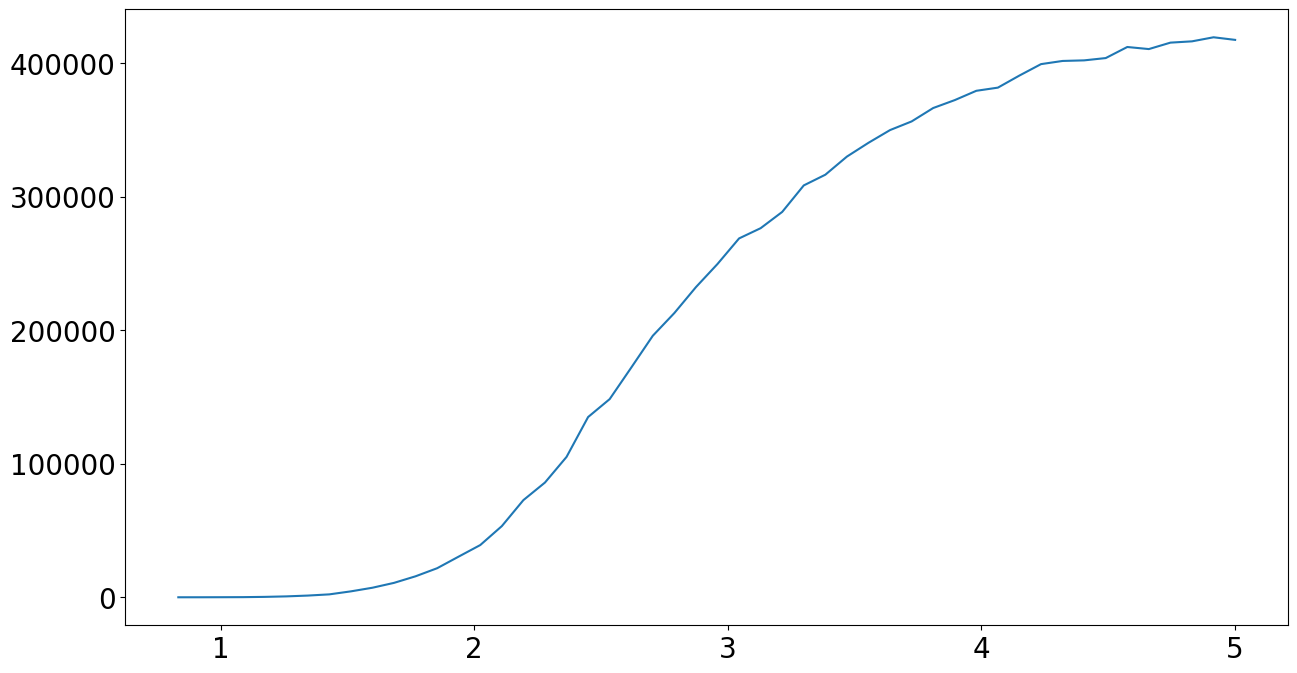

In [22]:
#plt.plot(kT, result[8][1e5]['E2MEAN']/1e5)
plt.plot(kT, CV1)

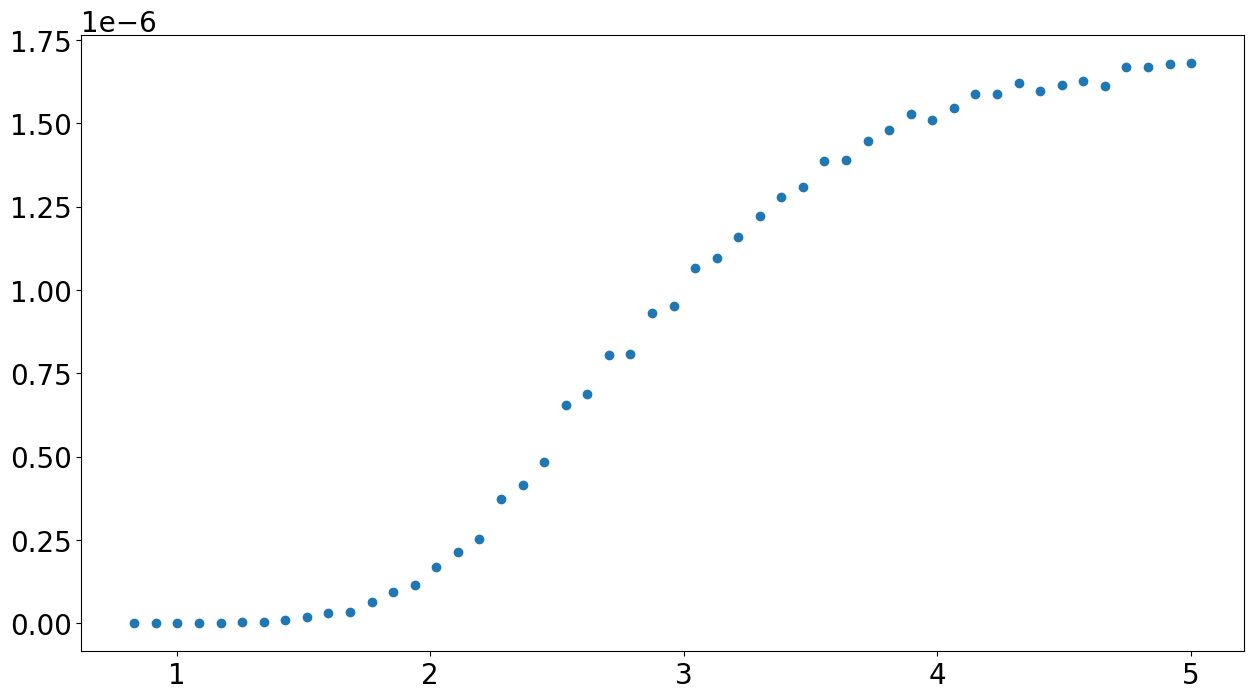

In [18]:
#plt.plot(kT, (result[8][1e5]['E2MEAN']/kT**2 - result[8][1e5]['EMEAN']**2/kT**2))
plt.plot(kT, result[8][1e5]['CV']/1e5,'o')
#plt.plot(kT, CV1)


In [ ]:
plt.plot(CV1)

In [ ]:
plt.plot(kT, result[8][1e5]['E2MEAN'])

In [ ]:
plt.plot(kT, result[8][1e5]['EMEAN']*8**2)
plt.plot(kT, result[4][1e5]['EMEAN']*4**2)

In [ ]:
plt.plot(kT, result[8][1e5]['CV']/kT**2)
plt.plot(kT, result[8][5e4]['CV']/kT**2)
#plt.plot(kT, result[4][1e5]['CV']/kT**2/1e5**2)
#plt.plot(kT, result[4][5e4]['CV']/kT**2/5e4**2)
#plt.plot(kT, result[8][1e5]['CV']/kT**2)

In [ ]:
plt.plot(kT, result[8][1e5]['CV']/kT**2/1e5**2)
plt.plot(kT, result[8][5e4]['CV']/kT**2/5e4**2)
#plt.plot(kT, result[4][1e5]['CV']/kT**2/1e5**2)
#plt.plot(kT, result[4][5e4]['CV']/kT**2/5e4**2)
#plt.plot(kT, result[8][1e5]['CV']/kT**2)